# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Цель:** научиться определять рыночную стоимость объектов недвижимости. 

**Задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Общая информация о данных

Импортируем библиотеку pandas и считываем csv файл с продажами квартир в переменную `data`.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import warnings

warnings.filterwarnings("ignore")


try:
    data = pd.read_csv(r'D:\На раб. стол\Учеба\Курсы\Инструменты анализа данных\Исследовательский анализ данных\real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Изучаем содержание csv файла. Для этого выведем первые 20 строк датафрейма.

In [8]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем информацию о датафрейме.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех числовых столбцов таблицы.

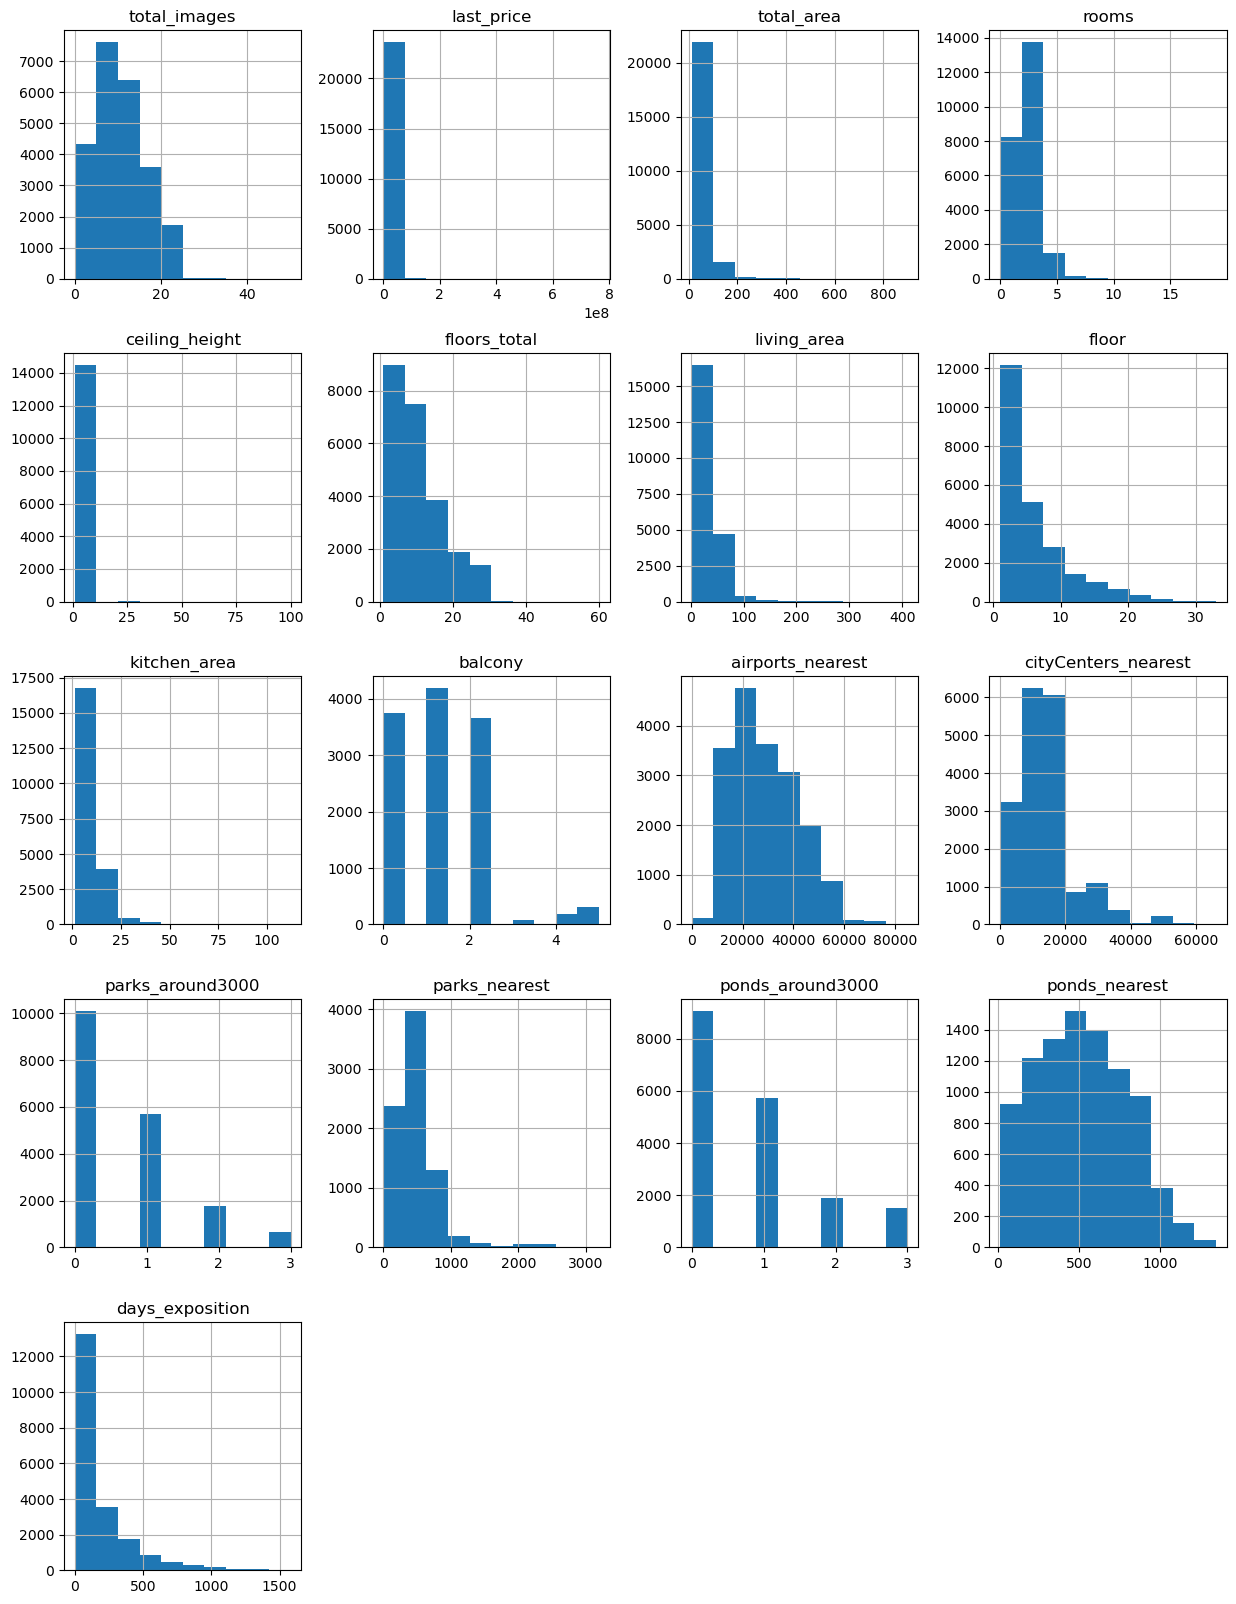

In [13]:
data.hist(figsize=(15,20))
plt.show()

По итогам анализа гистограмм, в столбце `ceiling_height` обнаружены явно аномальные значения.

## Предобработка данных

### Работа с пропусками

Переходим к предобработке данных. Для начала займемся пропущенными значениями в столбцах.

Выведем количество пропущенных значений для каждого столбца.

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Визуализируем пропуски.

<Axes: >

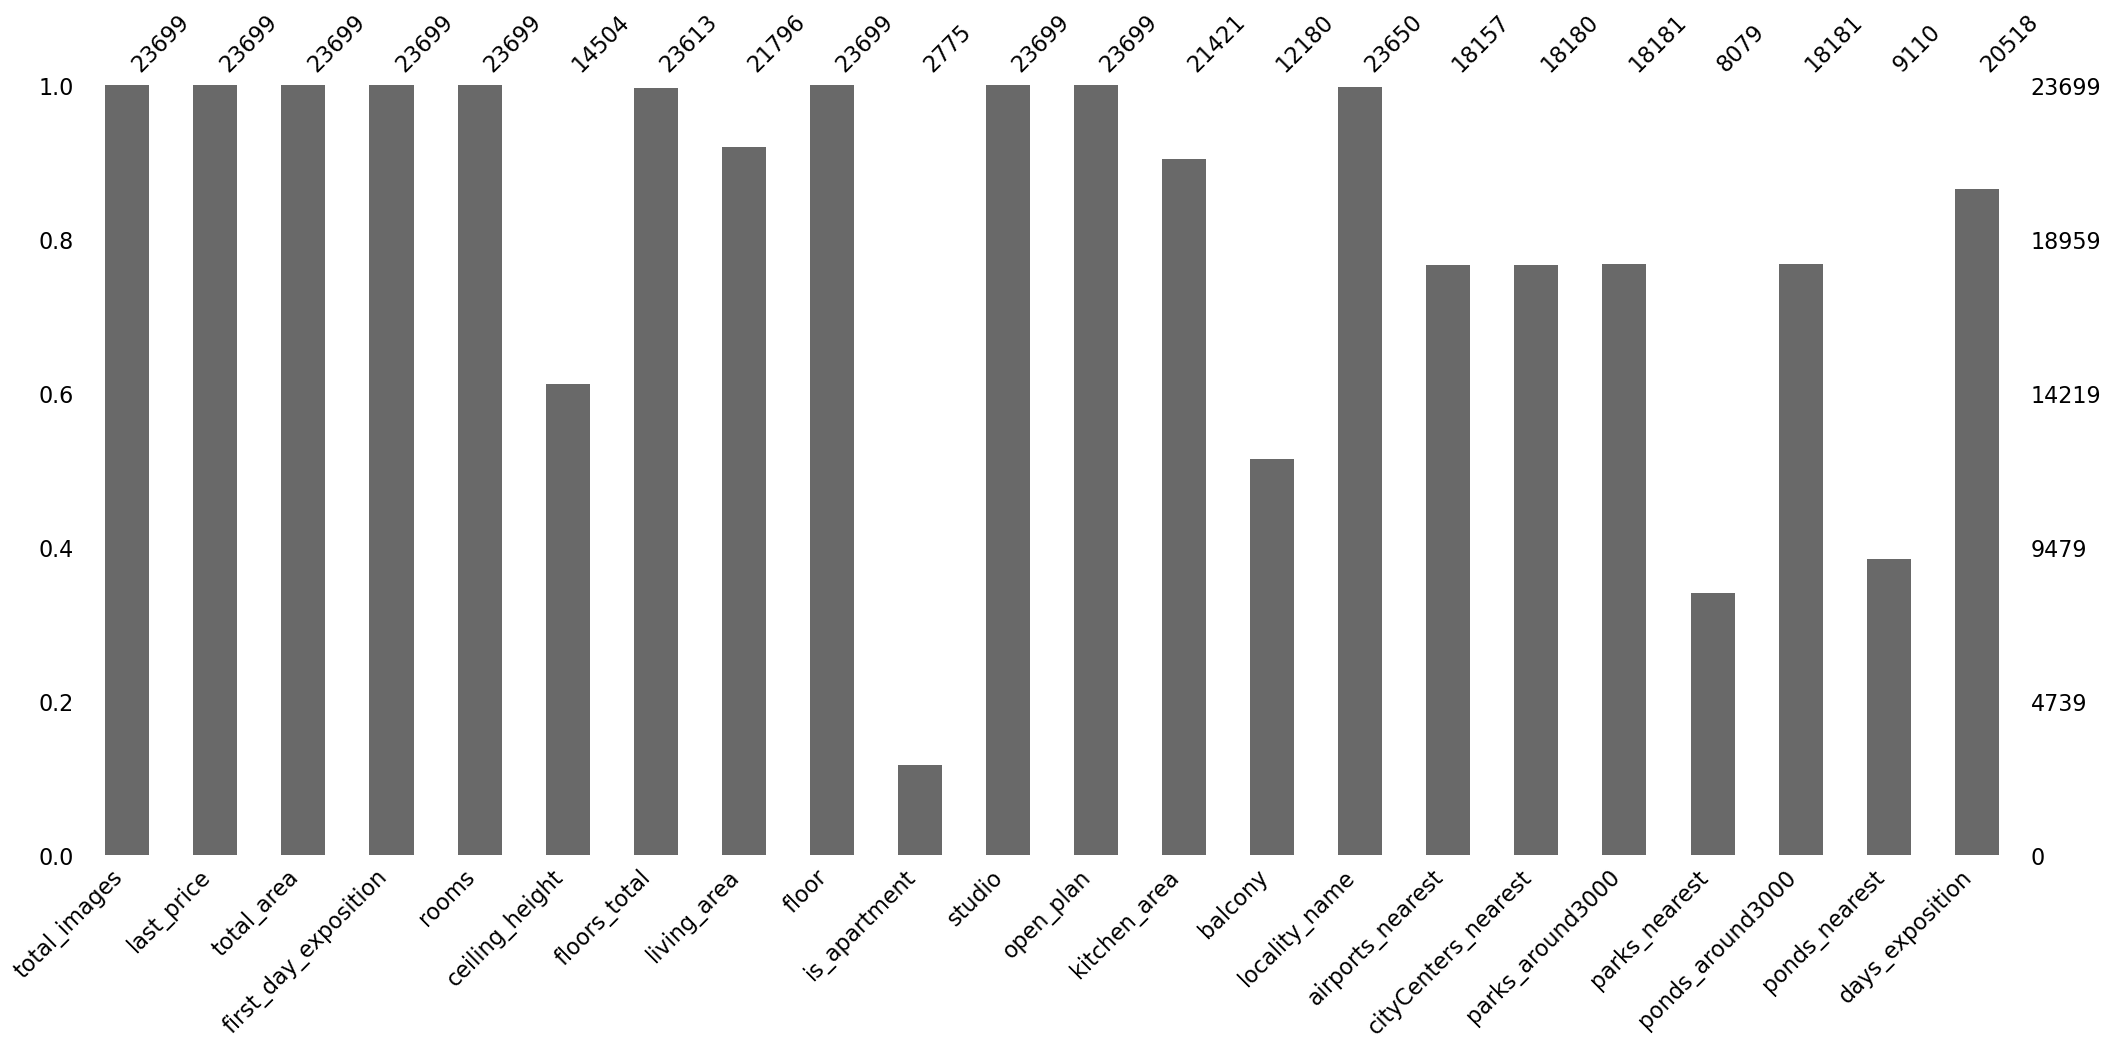

In [22]:
msno.bar(data.sample(23699))

- `ceiling_height` - это высота потолка. Пропуски оставляем, на исследование не повлияют.
- `floors_total` - общее количество этажей в доме. Для корректности дальнейшего исследования уберем строки с пропусками, их немного, на конечный результат это не повлияет
- `living_area` - жилая площадь. Важный параметр, количество пропусков не так велико, заполнение медианными или средними значениями может исказить данные.
- `is_apartment` - является ли объект аппартаментами. Проверим этот столбец подробнее.
- `kitchen_area` - площадь кухни. Параметр важен, но количество пропусков небольшое. Пропуски оставляем по причине невозможности корректного заполнения.
- `balcony` - количество балконов. Проверим этот столбец подробнее.
- `locality_name` - название населенного пункта. Количество пропусков небольшое, эти данные можно будет отбросить.
- `days_exposition` - пропуски в этом столбце означают, что квартира не была продана и оставалась в продаже на момент выгрузки данных.

Оставшиеся столбцы с пропусками заполнялись автоматически по на основании географического расположения. Эти пропуски также оставляем, заменять их какими-либо значениями будет некорректно.

Проверям столбец `is_apartment`. Выведем все значения столбца с их количеством.

In [27]:
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

Большая часть пользователей не указала этот параметр. Можно предположить, что абсолютное большинство тех, кто не указал этот параметр, продают квартиру. Но, как мы видим, количество значений апартаментов слишком мало, чтобы сколько нибудь значимо повлиять на исследование. 

Выборка достоверно определенных объектов, указанных как аппартаменты, также слишком мала для их исследования. Поэтому исследование будет проводиться без учета этого столбца, в целом по недвижимости, пропуски оставляем.

Проверям столбец `balcony`. Выведем все значения столбца с их количеством.

In [29]:
data['balcony'].value_counts()

balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

Предполагаем, что те, кто не указал количество балконов, их не имеют. Хотя, скорее всего, это не так, в квартирах чаще всего есть балкон или лоджия. С другой стороны непонятно, имеются ли здесь ввиду также и лоджии. 

Меняем пропущенные значения на 0. Дальшнейший анализ покажет насколько корректной будет такая замена.

In [31]:
data['balcony'] = data['balcony'].fillna(0)

Проверяем число пропусков в столбце.

Удалим пропуски из столбца `locality_name` и `floors_total`. 

Оценка без знания населенного пункта практически не имеет смысла, таких значений немного, отбросим их. Тоже самое с общим количеством этажей в квартире.

In [35]:
data = data.dropna(subset='locality_name')

In [36]:
data = data.dropna(subset='floors_total')

Снова проверим число пропусков в столбцах.

In [39]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Работа над исправлением пропусков закончена.

**Причины возникших пропусков:**
- В столбцах, которые заполняют пользователи, причинами пропусков являются неуказание параметра продавцом квартиры либо техническая ошибка.
- В столбцах с автоматическим заполнением, вероятная причина пропусков - неуказание пользователем точного адреса объекта или техническая ошибка.

Переходим к поискам аномальных значений.

### Аномальные значения
Выведем минимальные и максимальные значения для каждого столбца для выявления аномалий.

In [41]:
for column, label in data.items():
    print(data[column].agg(['min', 'max']))

min     0
max    50
Name: total_images, dtype: int64
min        12190.0
max    763000000.0
Name: last_price, dtype: float64
min     12.0
max    900.0
Name: total_area, dtype: float64
min    2014-11-27T00:00:00
max    2019-05-03T00:00:00
Name: first_day_exposition, dtype: object
min     0
max    19
Name: rooms, dtype: int64
min      1.0
max    100.0
Name: ceiling_height, dtype: float64
min     1.0
max    60.0
Name: floors_total, dtype: float64
min      2.0
max    409.7
Name: living_area, dtype: float64
min     1
max    33
Name: floor, dtype: int64
min    False
max     True
Name: is_apartment, dtype: bool
min    False
max     True
Name: studio, dtype: bool
min    False
max     True
Name: open_plan, dtype: bool
min      1.3
max    112.0
Name: kitchen_area, dtype: float64
min    0.0
max    5.0
Name: balcony, dtype: float64
min    Бокситогорск
max        село Шум
Name: locality_name, dtype: object
min        0.0
max    84869.0
Name: airports_nearest, dtype: float64
min      181.0
max    659

Аномально низкие или высокие значения обнаружены в столбцах: `last_price`, `ceiling_height`, `living_area`, `airports_nearest`.

#### Столбец last_price

Выведем первые 30 строк датафрейма с сортировкой столбца `last_price` по убыванию.

In [45]:
data.sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.00,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.70,25,NaN,...,112.00,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.00,9,False,...,24.00,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,NaN,...,40.00,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.00,5,NaN,...,70.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.70,6,NaN,...,30.20,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.80,4,NaN,...,29.80,0.0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.00,7,NaN,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,NaN,8.0,132.00,7,NaN,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


Высокие значения стоимости соответствуют характеристикам недвижимости.

Выведем первые 30 строк датафрейма с сортировкой столбца `last_price` по возрастанию.

In [47]:
data.sort_values(by='last_price',ascending=True).head(30)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,0.0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,...,NaN,0.0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,0.0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,...,9.0,0.0,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
23484,11,470000.0,44.5,2018-07-02T00:00:00,2,NaN,2.0,28.0,2,NaN,...,7.5,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0


Значение с ценой 12190 рублей явно аномальное. Сгруппируем остальные значения по стоимости недвижимости, общей площади и населенного пункта для проверки вариантов с ценой менее 1 млн. рублей

In [50]:
data.groupby(['locality_name', 'total_area','floors_total'])['last_price'].sum().sort_values().head(30)

locality_name                       total_area  floors_total
Сланцы                              30.4        2.0             430000.0
посёлок станции Свирь               54.0        3.0             430000.0
городской посёлок Будогощь          42.0        1.0             450000.0
деревня Старополье                  43.4        5.0             450000.0
деревня Ям-Тесово                   36.5        5.0             450000.0
деревня Вахнова Кара                38.5        2.0             450000.0
Сланцы                              44.5        2.0             470000.0
поселок Совхозный                   37.0        3.0             470000.0
деревня Выскатка                    41.0        5.0             470000.0
Сланцы                              29.1        5.0             490000.0
                                    52.0        2.0             500000.0
деревня Бор                         38.0        3.0             500000.0
поселок городского типа Никольский  34.0        5.0            

Как можно увидеть, дешевые варианты принадлежат небольшим населенным пунктам, в основном деревням.

Удалям одно аномальное значение с ценой 12190 руб.

In [52]:
data = data.loc[data['last_price'] > 13000]

Выведем первые 5 строк датафрейма с сортировкой столбца `last_price` по возрастанию для проверки изменений

In [54]:
data.sort_values(by='last_price',ascending=True).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,0.0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,0.0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Удаление аномальных значений  столбца `last_price` успешно выполнено.


#### Столбец ceiling_height

Выведем первые 30 строк датафрейма с сортировкой столбца `ceiling_height` по убыванию.

In [58]:
data.sort_values(by='ceiling_height',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0


Выведем самые часто встречающиеся высоты потолков

In [60]:
data['ceiling_height'].value_counts().head(30)

ceiling_height
2.50    3515
2.60    1645
2.70    1571
3.00    1108
2.80     988
2.55     980
2.75     905
2.65     674
3.20     276
3.10     203
2.90     164
3.30     141
2.56     139
3.50     130
2.57     103
2.85     101
3.40      92
2.54      83
2.64      81
2.52      79
2.53      67
2.58      63
2.77      61
2.76      60
3.15      57
2.78      51
2.95      47
3.05      46
4.00      38
2.67      36
Name: count, dtype: int64

Исходя из изученных данных по высоте потолков, предполагаем, что некоторые из аномально высоких значений были записаны с опечаткой:
* 25 это 2,4
* 26 это 2,6
* 27 это 2,7
* 27,5 это 2,75
* 32 это 3,2

Заменим эти аномальные значения на корректные.

In [62]:
ch_list = [25.0, 26.0, 27.0, 27.5, 32.0] #создаем список с нужными значениями для замены

for list in ch_list:
    data['ceiling_height'] = data['ceiling_height'].replace(list, list/10) #используем цикл для замены всех значений из списка


Удалим все значения из `ceiling_height` равные 8.0 и выше. 

Значение высоты потолка равное 8.0 было выбрано, так как стоимость недвижимости с такой высотой потолка была аномально низкой, что позволяет считать эти значения некорректными.


In [65]:
data = data.loc[data['ceiling_height'] < 8.0]

Выведем первые 5 строк датафрейма с сортировкой столбца `ceiling_height` по убыванию для проверки изменений

In [67]:
data.sort_values(by='ceiling_height',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,NaN,...,15.6,0.0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN


Теперь проверим аномально низкие значения в столбце `ceiling_height`.

Выведем первые 30 строк датафрейма с сортировкой столбца ceiling_height по возрастанию.

In [69]:
data.sort_values(by='ceiling_height',ascending=True).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.400000,7,NaN,...,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,...,5.20,0.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.400000,5,NaN,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22960,17,2300000.0,53.60,2018-10-18T00:00:00,2,2.00,2.0,19.000000,1,NaN,...,10.00,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.900000,2,NaN,...,12.00,0.0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,...,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.000000,5,False,...,6.00,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
19329,5,1700000.0,40.00,2018-07-15T00:00:00,2,2.00,9.0,NaN,8,NaN,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.000000,9,NaN,...,11.80,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В России по нормам, высота потолка не может быть меньше 2,5 м. Можем предполодить, что в старых домах могли быть потолки высотой 2,4 м или же покупатели округляли их в меньшую сторону.

Поэтому удалим все значения высоты потолков меньше 2,4 м.

In [71]:
data = data.loc[data['ceiling_height'] >= 2.4]

Выведем первые 5 строк датафрейма с сортировкой столбца `ceiling_height` по возрастанию для проверки изменений

In [74]:
data.sort_values(by='ceiling_height',ascending=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20085,9,3400000.0,53.0,2017-09-28T00:00:00,2,2.4,5.0,29.0,3,NaN,...,9.0,5.0,деревня Малое Верево,NaN,NaN,NaN,NaN,NaN,NaN,45.0
11868,10,7000000.0,60.0,2017-11-17T00:00:00,2,2.4,12.0,45.0,6,NaN,...,11.0,2.0,Санкт-Петербург,16106.0,15255.0,1.0,761.0,0.0,NaN,40.0
5918,14,2200000.0,49.5,2018-11-05T00:00:00,2,2.4,5.0,28.6,5,NaN,...,9.0,1.0,поселок Суходолье,NaN,NaN,NaN,NaN,NaN,NaN,67.0
3633,0,5100000.0,79.4,2018-09-25T00:00:00,3,2.4,8.0,47.4,6,False,...,14.0,5.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,16.0
13462,9,2600000.0,31.5,2016-08-10T00:00:00,1,2.4,5.0,16.9,5,NaN,...,5.5,1.0,Санкт-Петербург,19258.0,18261.0,1.0,692.0,1.0,523.0,476.0


Удаление аномальных значений  столбца `ceiling_height` успешно выполнено.

#### Столбец living_area
Выведем первые 10 строк датафрейма с сортировкой столбца `living_area` по возрастанию.


In [76]:
data.sort_values(by='living_area',ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,...,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.50,9.0,5.4,1,NaN,...,9.8,0.0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.60,5.0,6.0,1,NaN,...,17.0,0.0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.50,22.0,6.5,21,NaN,...,18.0,0.0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
20994,7,8900000.0,50.6,2018-10-22T00:00:00,2,2.50,7.0,8.0,3,NaN,...,31.0,0.0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN
114,5,4000000.0,21.4,2019-02-07T00:00:00,1,2.90,8.0,8.3,7,NaN,...,6.3,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
2309,10,4200000.0,62.4,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
21505,9,4100000.0,35.3,2018-01-10T00:00:00,1,2.75,27.0,8.5,11,NaN,...,16.1,2.0,Санкт-Петербург,33977.0,15076.0,0.0,NaN,0.0,NaN,60.0
17248,20,5300000.0,33.0,2017-04-14T00:00:00,1,2.70,22.0,8.9,16,NaN,...,16.1,1.0,Санкт-Петербург,33803.0,13671.0,0.0,NaN,0.0,NaN,216.0


Строки с жилой площадью менее 6,0 м явно аномальные. Они никак не соотносятся с общей площадью квартиры. Уберем их.

In [78]:
data = data.loc[data['living_area'] >= 6]

Выведем первые 5 строк датафрейма с сортировкой столбца `living_area` по возрастанию для проверки изменений

In [80]:
data.sort_values(by='living_area',ascending=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.6,5.0,6.0,1,NaN,...,17.0,0.0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.5,22.0,6.5,21,NaN,...,18.0,0.0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
20994,7,8900000.0,50.6,2018-10-22T00:00:00,2,2.5,7.0,8.0,3,NaN,...,31.0,0.0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN
114,5,4000000.0,21.4,2019-02-07T00:00:00,1,2.9,8.0,8.3,7,NaN,...,6.3,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
2309,10,4200000.0,62.4,2017-06-15T00:00:00,2,2.6,9.0,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0


Удаление аномальных значений  столбца `living_area` успешно выполнено.

#### Столбец airports_nearest
Выведем первые строки датафрейма столбца `airports_nearest` равного 0. Дом не может находиться в аэропорте, нужно проверить эти строки.

In [82]:
data.loc[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Такая строка есть только одна. Удалим ее.

In [85]:
data = data.loc[data['airports_nearest'] != 0]

Теперь проверим ее наличие.

In [87]:
data.loc[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Удаление аномальных значений  столбца `living_area` успешно выполнено.

**Аномальные значения присутствовали в данных из-за ошибочного заполнения пользователем или технической ошибки.**

### Обработка дубликатов

Для начала проверим есть ли строки-дубликаты в данных.

In [90]:
data.duplicated().sum()

0

Явных строк-дубликатов нет, но могут быть неявные дубликаты в столбце `locality_name` из-за разного написания городов. Проверим эту гипотезу.

In [93]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'посёлок Мурино', 'Сертолово',
       'Гатчина', 'поселок Мурино', 'Ломоносов', 'деревня Фёдоровское',
       'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'поселок Оредеж',
       'посёлок городского типа Красный Бор', 'посело

Обнаруживаем разные написания следующих наиболее часто встречающихся населенных пунктов: **Мурино, Бугры, Кудрово, Коммунар, Янино-1, Тельмана, Мга, Кузьмоловский.**

Произведем их замену на единое написание.

Обработка единично встреченных деревень или поселков не повлияет на конечный результат, оставить их будет рациональнее.

In [95]:
ln_list = ['Мурино', 'Бугры', 'Кудрово', 'Коммунар', 'Янино-1', 'Тельмана', 'Мга', 'Кузьмоловский'] #создаем список с городами для замены

for town in ln_list:
    data['locality_name'] = data['locality_name'].apply(lambda x: town if town in x else x) #заменяем значения путем перебора каждого из списка

Проверим результат замены.

In [98]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово', 'Кудрово',
       'Пушкин', 'Мурино', 'Сертолово', 'Гатчина', 'Ломоносов',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'Кузьмоловский',
       'деревня Куттузи', 'поселок Торковичи', 'посёлок Шушары',
       'поселок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'деревня Старая', 'деревня Лесколово', 'село Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'поселок Оредеж',
       'посёлок городского типа Красный Бор', 'Бугры',
       'посёлок Металлострой', 'посёлок Молодёжное', 'деревня Нурма',
       'пос

Замена выполнена успешно.

Такие неявные дубликаты образованы из-за ручного ввода населенного пункта пользователем. Лучше использовать готовый список значений, чтобы избежать таких проблем в будущем.

### Изменение типа данных

Для корректности анализа нужно заменить тип данных в столбце `first_day_exposition` на **datetime**.

In [100]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Приведем к целочисленному значению столбец `floors_total`.

In [317]:
data['floors_total'] = data['floors_total'].astype('int32')

Проверим корректность изменений.

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13654 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          13654 non-null  int64         
 1   last_price            13654 non-null  float64       
 2   total_area            13654 non-null  float64       
 3   first_day_exposition  13654 non-null  datetime64[ns]
 4   rooms                 13654 non-null  int64         
 5   ceiling_height        13654 non-null  float64       
 6   floors_total          13654 non-null  int32         
 7   living_area           13654 non-null  float64       
 8   floor                 13654 non-null  int64         
 9   is_apartment          1780 non-null   object        
 10  studio                13654 non-null  bool          
 11  open_plan             13654 non-null  bool          
 12  kitchen_area          13287 non-null  float64       
 13  balcony              

Данные успешно преобразованы.

Без этих изменений мы бы не смогли анализировать данные по датам и корректно определять последний и первый этажи.

### Посчитайте и добавьте в таблицу новые столбцы

Для последующего анализа данных нам необходимо добавить некоторые столбцы в датафрейм.

#### Стоимость квадратного метра

Сначала добавим новый столбец `price_sq_m` со **стоимостью одного квадратного метра** недвижимости и сразу заменим тип данных на integer для удобства.

In [108]:
data['price_sq_m'] = data['last_price'] / data['total_area']

data['price_sq_m'] = data['price_sq_m'].astype('int')

Проверим корректность создания столбца.

In [111]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943


Данные успешно добавлены.

#### День, месяц, год публикации объявления
Следующим шагом добавим **день, месяц и год публикации объявления** в столбцы `weekday_exp`, `month_exp`, `year_exp` соответственно.

In [113]:
data['weekday_exp'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #создаем столбец с днем публикации объявления.

In [114]:
data['month_exp'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [115]:
data['year_exp'] = pd.DatetimeIndex(data['first_day_exposition']).year

Проверим корректность создания данных.

In [117]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_exp,month_exp,year_exp
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525,3,11,2017
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,33058.0,1.0,294.0,3.0,298.0,366.0,82943,5,7,2017


Данные успешно добавлены в датафрейм.

#### Этажность
Теперь нужно добавить информацию по этажности в столбец `floor_name`. Для первого этажа напишем "первый", для последнего "последний", для остальных других "другой".

In [119]:
data = data.assign(floor_name=pd.Series(dtype='object')) #создаем новый столбец

#присваиваем ему значения с помощью логической индексациии
data.loc[data['floor'] == 1, 'floor_name'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_name'] = 'последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1) , 'floor_name'] = 'другой'


Проверяем получившийся датафрейм.

In [122]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_exp,month_exp,year_exp,floor_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,1.0,310.0,2.0,553.0,137.0,127525,3,11,2017,другой
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,1.0,294.0,3.0,298.0,366.0,82943,5,7,2017,последний
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,3.0,420.0,0.0,NaN,397.0,81707,3,11,2017,первый
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,NaN,...,1.0,759.0,0.0,NaN,168.0,104838,4,1,2017,другой
19,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,0.0,NaN,0.0,NaN,97.0,117355,2,1,2019,другой
20,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,0.0,NaN,0.0,NaN,74.0,76500,3,9,2017,другой
22,20,5000000.0,58.0,2017-04-24,2,2.75,25,30.0,15,NaN,...,NaN,NaN,NaN,NaN,60.0,86206,0,4,2017,другой


Столбец добавлен успешно.

#### Расстояние от центра города в километрах

Добавим в столбец `city_center_km` в котором будет расстояние от центра города до продаваемой недвижимости в километрах и преобразуем в целое число

In [386]:
data['city_center_km'] = data['cityCenters_nearest'].apply(lambda x: x/1000)
data['city_center_km'] = data['city_center_km'].fillna(value=0).astype(int)


Проверяем получившийся датафрейм.

In [388]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_exp,month_exp,year_exp,floor_name,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,NaN,0.0,NaN,289.0,88524,6,2,2017,другой,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,310.0,2.0,553.0,137.0,127525,3,11,2017,другой,13
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,294.0,3.0,298.0,366.0,82943,5,7,2017,последний,33


Все необходимые шаги преодбработки данных завершены. Можно приступать к их анализу.

## Проведите исследовательский анализ данных

### Изучение основных параметров

#### Общая площадь

Изучим распределение общей площади квартир. Для этого выведем минимальные и максимальные значения по соответствующему столбцу и построим гистограмму. 

In [130]:
data['total_area'].agg(['min', 'max'])

min     12.0
max    900.0
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Распределение общих площадей квартир')

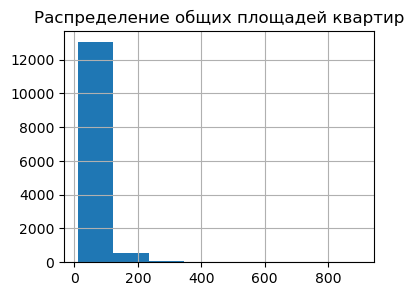

In [329]:
data['total_area'].hist(bins = 8,figsize=(4,3))
plt.title('Распределение общих площадей квартир')

Абсолютное большинство площадей недвижимости находится в диапазоне до 100 кв.м. Также в данных есть до 1000 объектов площадью до от 100 до 200 кв.м.
Объекты, площадью более 200 кв.м, представлены в единичных количествах. 

Минимальная площадь недвижимости составляет 12 кв. м .Максимальная площадь квартир доходит до 900 кв.м.

#### Жилая площадь

Изучим распределение жилой площади квартир. Для этого выведем минимальные и максимальные значения по соответствующему столбцу и построим гистограмму. 

In [135]:
data['living_area'].agg(['min', 'max'])

min      6.0
max    409.7
Name: living_area, dtype: float64

<Axes: >

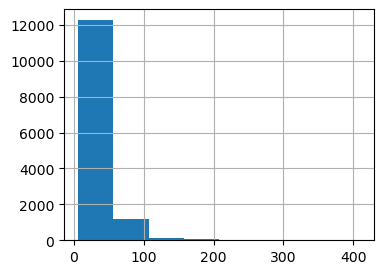

In [136]:
data['living_area'].hist(bins = 8,figsize=(4,3))

В данных есть много пропусков, то есть не все продавцы указали эту характеристику. Поэтому полное сравнение с общей площадью будет некорректно.

Абсолютное большинство недвижимости находятся в диапазоне до 50 кв.м. жилой площади. До 2000 - от 50 до 100 кв.м. Также есть небольшое количество объектов с жилой площадью от 100 до 200 кв.м. Есть единичные случаи с площадью более 200 кв.м. 

Минимальная жилая площадь составляет 6,0 кв.м. Максимальная жилая площадь составляет более 400 кв.м.

#### Площадь кухни

Изучим распределение площади кухонь. Для этого выведем минимальные и максимальные значения по соответствующему столбцу и построим гистограмму. 

In [139]:
data['kitchen_area'].agg(['min', 'max'])

min      1.3
max    112.0
Name: kitchen_area, dtype: float64

<Axes: >

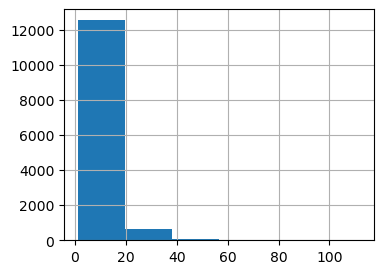

In [140]:
data['kitchen_area'].hist(bins = 6,figsize=(4,3))

В данных есть много пропусков, то есть не все продавцы указали эту характеристику. Поэтому полное сравнение с общей или жилой площадью будет некорректно.

Абсолютное большинство недвижимости находятся в диапазоне до  20 кв.м площади кухни. Часть  имеют площадь кухни от 20 до 40 кв.м (около 500). Кухни, площадью более 40 кв.м являются редкостью в данных.

Минимальная площадь кухни составляет 1,3 кв.м. Максимальная - 112 кв.м.

#### Цена объекта
Изучим распределение стоимости недвижимости. Для этого выведем минимальные и максимальные значения по соответствующему столбцу и построим гистограмму. 

In [142]:
data['last_price'].agg(['min', 'max'])

min       490000.0
max    420000000.0
Name: last_price, dtype: float64

<Axes: >

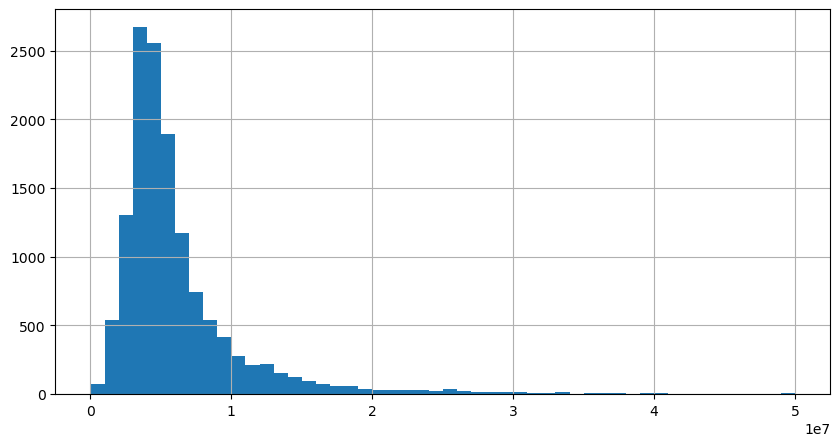

In [143]:
data['last_price'].hist(bins = 50,figsize=(10,5),range=(0, 50000000))

Стоимость абсолютного большинства недвижимости находится в пределах 10 млн. руб (чаще всего 4-5). Небольшая часть стоит от 10 до 50 млн. руб. Очень редко встречаются объекты стоимостью от 50 до 420 млн руб. 

Минимальная стоимость недвижимости - 490 тыс. руб. Максимальная - 420 млн. руб.

#### Количество комнат
Изучим распределение по количеству комнат. Для этого построим гистограмму по соответствующему столбцу и посмотрим максимальное и минимальное значение.

In [145]:
data['rooms'].agg(['min', 'max'])

min     0
max    16
Name: rooms, dtype: int64

<Axes: >

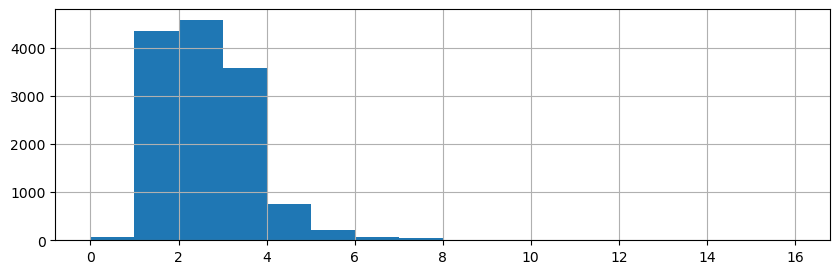

In [333]:
data['rooms'].hist(bins = 16,figsize=(10,3))

Абсолютное большинство объектов имеют от 1 до 3 комнат. До 1000 имеют 4 комнаты, менее 500 - 5 комнат. 6 комнат и более имеют единичные объекты недвижимости. 

Максимальное количество комнат - 16.

#### Высота потолков
Изучим распределение по высоте потолков. Для этого построим гистограмму по соответствующему столбцу и посмотрим максимальное и минимальное значение.

In [149]:
data['ceiling_height'].agg(['min', 'max'])

min    2.4
max    6.0
Name: ceiling_height, dtype: float64

<Axes: >

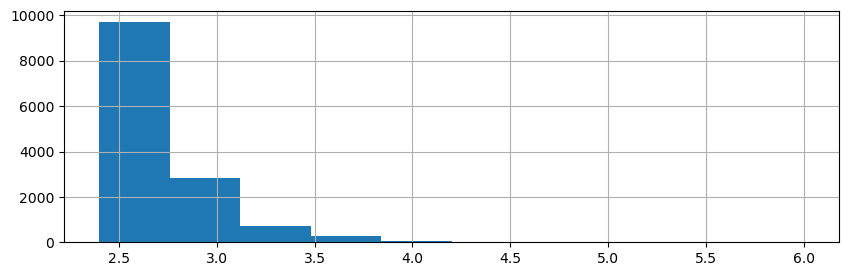

In [150]:
data['ceiling_height'].hist(figsize=(10,3))

Абсолютное большинство квартир находятся в диапазоне высот потолков от 2,4 до 2,7 м. Большая часть имеет высоту от 2,7 до 3,1 м. Высоты потолков от 3,1 до 4,2 м встречаются намного реже. Выше 4,2 м - единичные случаи.

Минимальная высота потолков в выборке 2,4 м. Максимальная 6,0 м.

#### Этаж квартиры
Изучим распределение по этаже квартиры. Для этого построим гистограмму по соответствующему столбцу и посмотрим максимальное и минимальное значение.

In [153]:
data['floor'].agg(['min', 'max'])

min     1
max    30
Name: floor, dtype: int64

<Axes: >

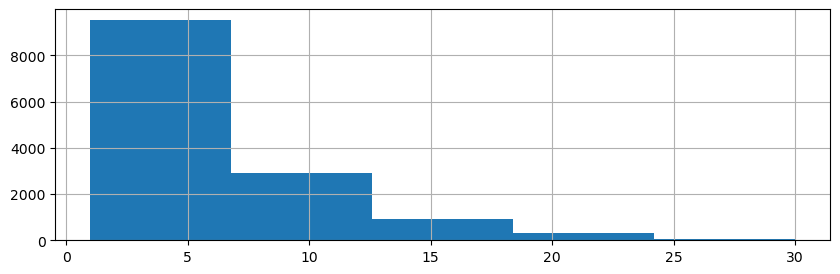

In [154]:
data['floor'].hist(bins = 5,figsize=(10,3))

Абсолютное большинство недвижимости находится на этаже от 1 до 7. Около 3000 квартир в выборке от 7 до 13 этажа. Реже встречаются объекты от 13 до 24 этажей. От 24 до 30 этажей - наиболее редкие случаи.

Самый низкий этаже - 1, высокий 30.
#### Тип этажа квартиры
Изучим распределение по типу этажа квартиры. Для этого построим гистограмму по соответствующему столбцу.

<Axes: >

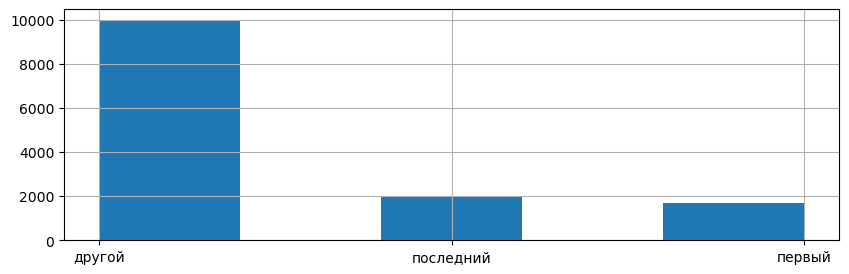

In [156]:
data['floor_name'].hist(bins = 5,figsize=(10,3))

Абсолютное большинство квартир (около 10 тыс.) расположены не на первом и не на последнем этажах. На последнем этаже больше квартир (около 2 тыс), чем на первом (менее 2 тыс.), но эта разница невелика.

#### Этажность дома
Изучим распределение по количеству этажей в  домах. Для этого построим гистограмму по соответствующему столбцу  и посмотрим максимальное и минимальное значение.

In [159]:
data['floors_total'].agg(['min', 'max'])

min     1
max    60
Name: floors_total, dtype: int64

<Axes: >

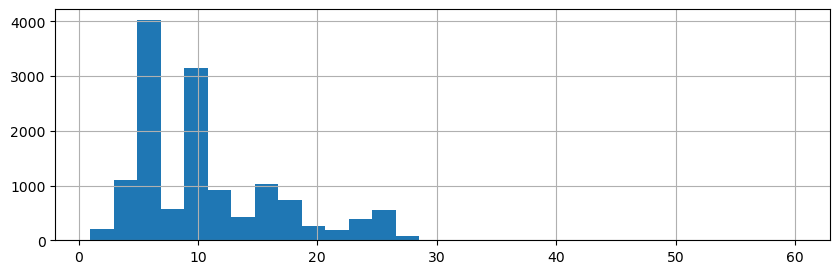

In [335]:
data['floors_total'].hist(bins = 30,figsize=(10,3))

Большая часть домов имеют этажность от 5 до 12. Следующая категория от 12 до 16. Чуть меньше малоэтажных домов - от 1 до 5 этажей. Еще реже встречаются дома от 16 до 28 этажей. Дома выше 28 этажей редки.

На гистограмме с 30 корзинами мы можем увидеть выбросы в районе 5, 9 и 15 этажей. Они позволяют говорить о том, что в выборке много домов дореволюционного периода.

Минимальная этажность - 1, максимальная - 60.

#### Расстояние до центра города
Изучим распределение по расстоянию до центра города. Для этого построим гистограмму по соответствующему столбцу  и посмотрим максимальное и минимальное значение.

In [163]:
data['cityCenters_nearest'].agg(['min', 'max'])

min      181.0
max    65968.0
Name: cityCenters_nearest, dtype: float64

<Axes: >

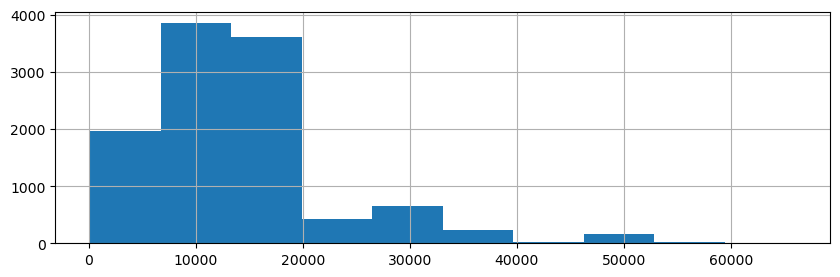

In [164]:
data['cityCenters_nearest'].hist(figsize=(10,3))

Большая часть квартир находится на расстоянии от 7 км до 20 км от центра. Меньше квартир с расстоянием до центра до 7 км.
Реже встречаются квартиры от 20 до 40 км от центра, а также от 46 до 52. Остальные расстояния от центра отмечаются редко.

Минимальное значение от центра 181 м, максимальное 65968 м.

В данных было много пропусков, они не оценивают всю выборку.

#### Расстояние до аэропорта
Изучим распределение по расстоянию до аэропорта. Для этого построим гистограмму по соответствующему столбцу  и посмотрим максимальное и минимальное значение.

In [166]:
data['airports_nearest'].agg(['min', 'max'])

min     6914.0
max    84869.0
Name: airports_nearest, dtype: float64

<Axes: >

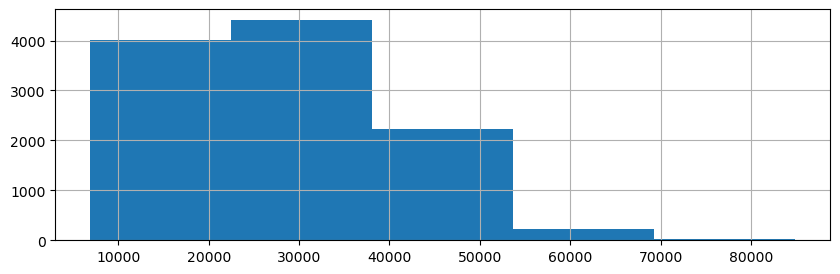

In [167]:
data['airports_nearest'].hist(bins = 5,figsize=(10,3))

Большая часть недвижимости находится на расстоянии от 7 до почти 40 км. Меньшая часть расположена на расстоянии от около 38 км до более чем 50. Еще реже встречается недвижимость на расстоянии от около 54 до почти 70 км до аэропорта. Значения более 70 км встречаются редко.

Минимальное значение расстояния - 6914 м, максимальное 84869 м.

В данных было много пропусков, они не оценивают всю выборку.

#### Расстояние до парка
Изучим распределение по расстоянию до парка. Для этого построим гистограмму по соответствующему столбцу и посмотрим максимальное и минимальное значение.

In [170]:
data['parks_nearest'].agg(['min', 'max'])

min       3.0
max    3190.0
Name: parks_nearest, dtype: float64

<Axes: >

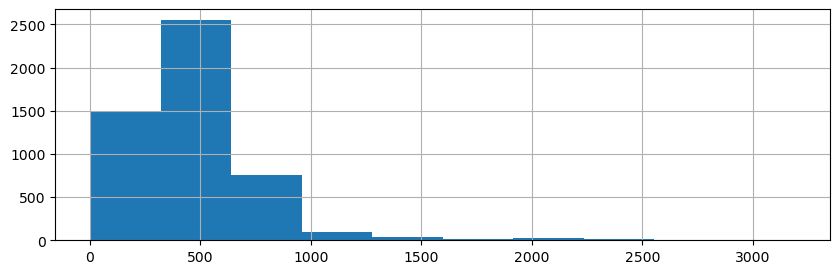

In [171]:
data['parks_nearest'].hist(bins = 10,figsize=(10,3))

Большая часть квартир расположена на расстоянии от около 400 до 600 м до парка. Меньше до 400 м. Еще реже - от 600 до почти 1000 м. Редко встречаются квартиры с расстоянием  до парка более 1000 м.

Минимальное значение расстояния - 3 м, максимальное 3190 м.

В данных было много пропусков, они не оценивают всю выборку.

#### День публикации объявления
Изучим распределение по дням публикации объявления. Для этого построим гистограмму по соответствующему столбцу.

<Axes: >

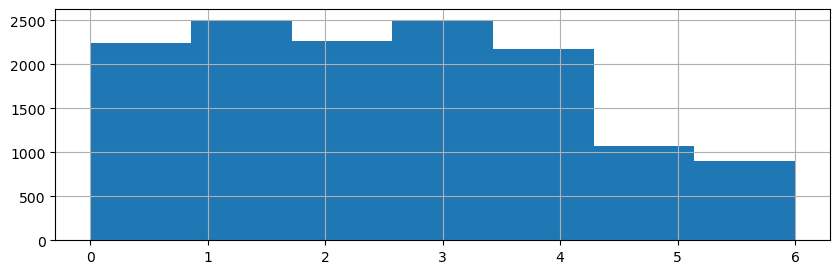

In [173]:
data['weekday_exp'].hist(bins = 7,figsize=(10,3))

Большинство объявлении было опубликовано в будние дни. Вторник и среда лидируют с приблизительно одинаковым числом публикаций. Самые редки дни - суббота и воскресенье. В воскресенье чуть реже, чем в субботу.
#### Месяц публикации объявления
Изучим распределение по месяцам публикации объявления. Для этого построим гистограмму по соответствующему столбцу.

<Axes: >

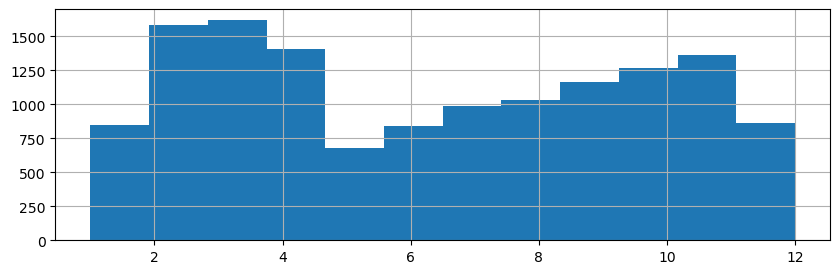

In [176]:
data['month_exp'].hist(bins = 12,figsize=(10,3))

Большая часть объявлений опубликована в весенние месяцы (февраль, март, апрель). С мая начинается резкое снижение количества публикаций и постепенный рост до максимумов в ноябре и резкая просадка в декабре.

Самые минимальные месяцы с точки зрения публикации объявлений - май, июнь, январь и декабрь.

Был проведен анализ данных по разным параметрам. Можно сделать вывод что данные достаточно разношерстные, выборка представлена очень широкая.

### Скорость продаж квартир
Изучим насколько быстро продавались квартиры.

Для этого построим гистограмму и проверим распределение методом describe().

<Axes: >

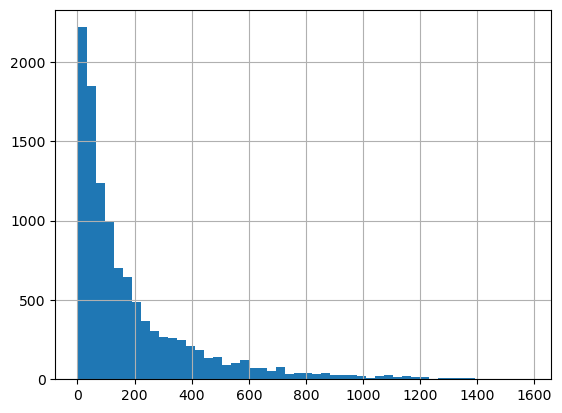

In [350]:
data['days_exposition'].hist(bins=50)

<Axes: >

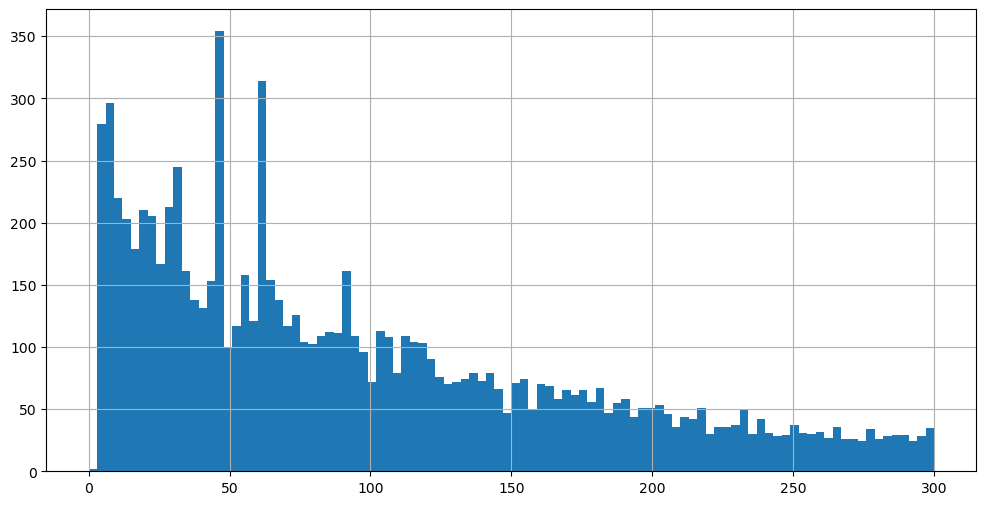

In [374]:
data['days_exposition'].hist(bins=100, figsize=(12,6), range=(0, 300))

In [180]:
data['days_exposition'].describe()

count    11310.000000
mean       192.529443
std        229.252521
min          1.000000
25%         45.000000
50%        106.000000
75%        251.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение экспозиции объявления - 192 дня.
Медианное  - 106 дней.
Половина объявлений находятся в продаже до 106 дней, вторая половина больше 106 дней.

Быстрыми можно считать продажи в пределах первого квартиля - до 45 дней. 
Долгие продажи в пределах последнего квантиля - от 251 до 1580 дней.

На гистограмме со 100 корзинами и с рассматриваемым периодом до 300 дней, мы можем увидеть выбросы в районе чуть меньше 50 и около 60 дней. Выбросы достаточно большие, возможно, это какое-то из правил публикации объявлений агентствами по продаже недвижимости и объявления были попросту сняты.

### Факторы влияющие на цену объекта
Построим графики зависимости цены от некоторых параметров.
#### Цена и общая площадь
Для начала проверим зависимость цены от общей площади квартиры.

Для этого расчитаем коэффициент корреляции Пирсона и построим диаграмму рассеяния.

In [182]:
data['last_price'].corr(data['total_area'])


0.7084306684518777

<Axes: xlabel='total_area', ylabel='last_price'>

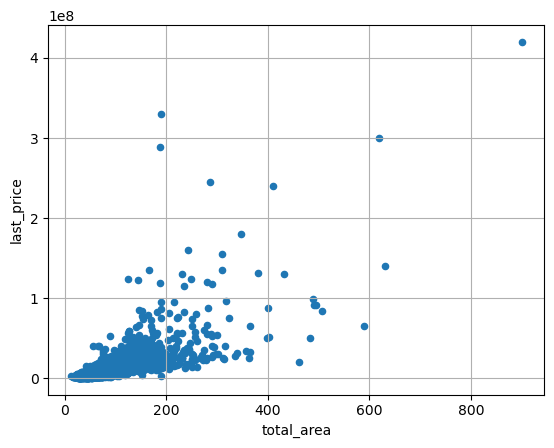

In [183]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', grid=True)

Коэфициент корреляции между ценой недвижимости и общей площади - 0,7. Это достаточно близко к единице, можем сделать вывод, что зависимость между этими двумя величинами очень существенна и стремится к линейной.

По графику мы также видим эту зависимость, отдельные точки на графике, скорее являются уникальными предложениями, которые в целом не влияют на общий вывод по корреляции рассматриваемых величин.

#### Цена и жилая площадь

Проверим зависимость цены от жилой площади квартиры.

Для этого расчитаем коэффициент корреляции Пирсона и построим диаграмму рассеяния.

In [186]:
data['last_price'].corr(data['living_area'])

0.6169657966099018

<Axes: xlabel='living_area', ylabel='last_price'>

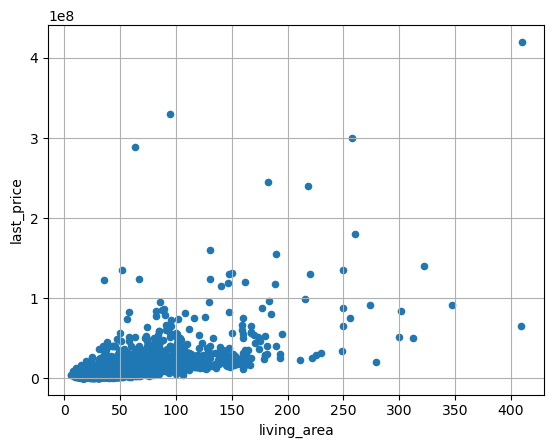

In [187]:
data.sort_values('total_area').plot(x='living_area', y='last_price', kind='scatter', grid=True)

Коэфициент корреляции между ценой недвижимости и жилой площади - 0,62. Можем сделать вывод, что зависимость между этими двумя величинами существенна, связь достаточно тесная, но она меньше, чем связь между общей площадью и ценой.

По графику мы также видим эту зависимость, отдельные точки на графике, скорее являются уникальными предложениями, которые в целом не влияют на общий вывод по корреляции рассматриваемых величин.

#### Цена и площадь кухни

Проверим зависимость цены от площади кухни квартиры.

Для этого расчитаем коэффициент корреляции Пирсона и построим диаграмму рассеяния.

In [189]:
data['last_price'].corr(data['kitchen_area'])

0.5364531271958074

<Axes: xlabel='kitchen_area', ylabel='last_price'>

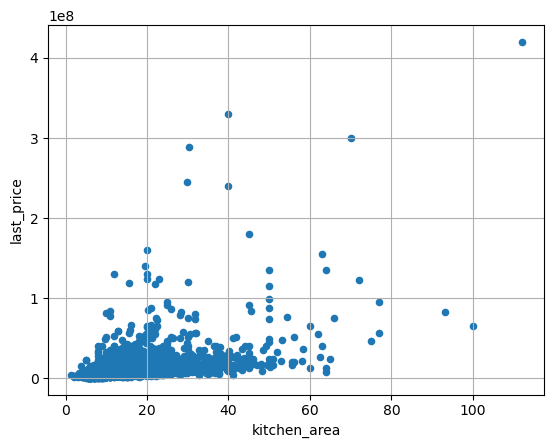

In [190]:
data.sort_values('total_area').plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

Коэфициент корреляции между ценой недвижимости и общей площади - 0,53. Можем сделать вывод, что зависимость между этими двумя величинами существенна, связь достаточно тесная, но она меньше, чем связь между общей и жилой площадями с ценой.

По графику мы также видим эту зависимость, отдельные точки на графике, скорее являются уникальными предложениями, которые в целом не влияют на общий вывод по корреляции рассматриваемых величин.

**Вывод**: площади квартир очень тесно связаны с ценой. Наиболее сильная связь с общей площадью квартиры.

#### Цена и количество комнат

Проверим зависимость цены от площади кухни квартиры.

Для этого построим график зависимости средней цены квартиры от количества комнат.

<Axes: xlabel='rooms'>

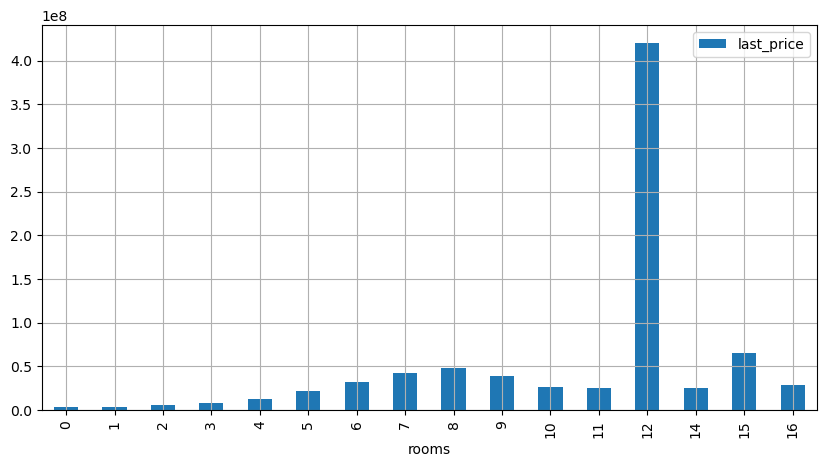

In [193]:
data.pivot_table(index='rooms', values='last_price').plot(kind='bar', grid=True, figsize=(10,5))

На графике мы видим прямую зависимость средней стоимости квартиры от количества комнат, начиная от студий и заканчивая 8-комнатными квартирами. В дальнейшем средняя цена изменяется случайным образом, она как растет, так и падает с увеличением количества комнат. Это связано с тем, что количество предложений с 9 комнатами и выше невелико, они являются уникальными, поэтому прямой зависимости на графике не наблюдается.

Есть прямая зависимость средних цен на недвижимость начиная от студий и заканчивая квартирами с 8 комнатами. Чем комнат в квартире больше, тем цена выше. От 9 комнатных квартир и больше такой зависимости нет.

#### Цена и тип этажа

Проверим зависимость цены от типа этажа квартиры.

Для этого построим график зависимости средней цены квартиры от типа этажа.

<Axes: xlabel='floor_name'>

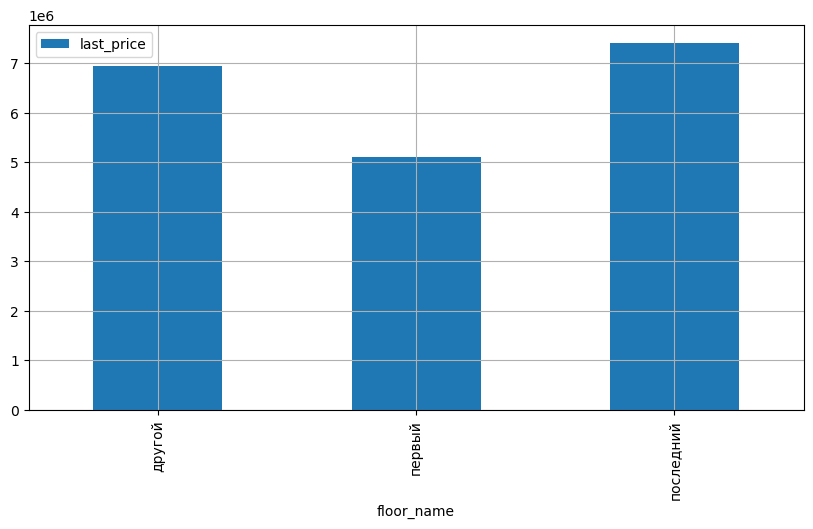

In [195]:
data.pivot_table(index='floor_name', values='last_price').plot(kind='bar', grid=True, figsize=(10,5))

Средняя цена квартир на первом этаже в среднем ниже, чем на остальных. Также квартиры на последнем этаже в среднем дороже квартир на остальных этажах.

#### Цена и день размещения

Проверим зависимость цены от дня размещения объявления.

Для этого построим график зависимости средней цены квартиры от дня размещения.

<Axes: xlabel='weekday_exp'>

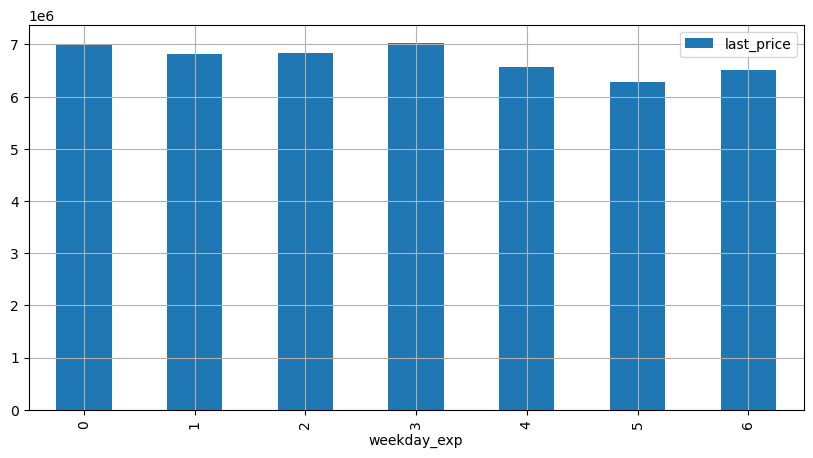

In [198]:
data.pivot_table(index='weekday_exp', values='last_price').plot(kind='bar', grid=True, figsize=(10,5))

По дням недели можно увидеть небольшую тенденцию к снижению средней цены от понедельника к субботе. В субботу средняя цена наиболее низкая, в среду - высокая. В воскресенье цена снова возрастает. В среду и в понедельник отличие средней цены незначительное.

#### Цена и месяц размещения

Проверим зависимость цены от месяца размещения объявления.

Для этого построим график зависимости средней цены квартиры от месяца размещения.

<Axes: xlabel='month_exp'>

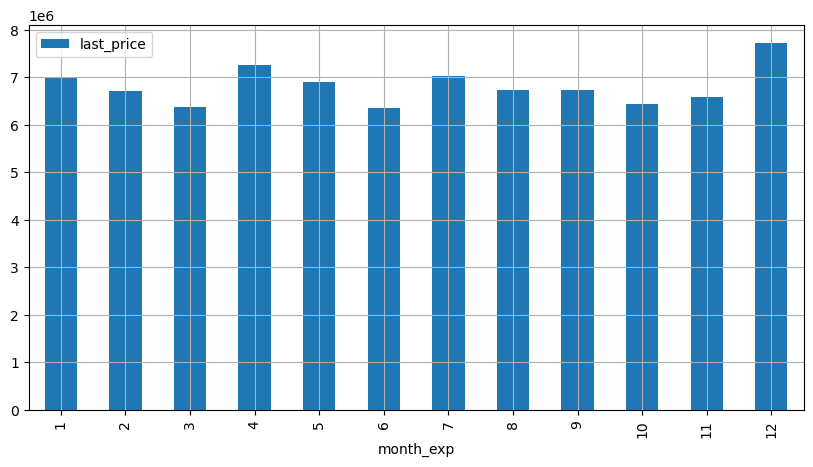

In [200]:
data.pivot_table(index='month_exp', values='last_price').plot(kind='bar', grid=True, figsize=(10,5))

Четкой корелляции между месяцем публикации объявления и ценой не наблюдается. В течении года средняя цена то растет, то падает. 

Максимальные значения средней цены выявлены при публикации объявления в декабре, здесь разница действительно значительна в сравнении с другими месяцами. Минимальная средняя цена при публикации в марте и июне.

#### Цена и год размещения

Проверим зависимость цены от года размещения объявления.

Для этого построим график зависимости средней цены квартиры от года размещения.

<Axes: xlabel='year_exp'>

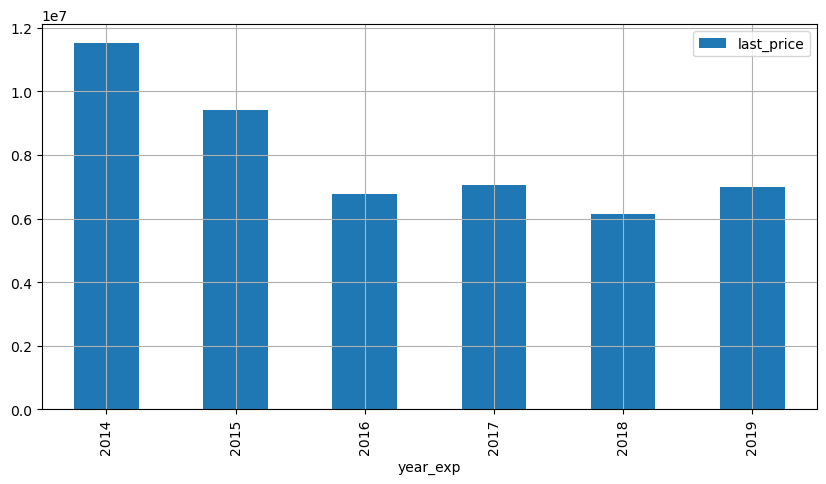

In [202]:
data.pivot_table(index='year_exp', values='last_price').plot(kind='bar', grid=True, figsize=(10,5))

С 2014 до 2019 год явно прослеживается снижение цены на недвижимость. В 2017 году происходит некоторый рост цен, а затем, в 2018 снова снижение (минимальное значение). В 2019 году, в сравнении с 2018 снова происходит рост.

**Вывод:** все исследованные параметры показали некоторую зависимость цен на недвижимость.

Из количественных параметров наиболее сильная зависимость цены квартиры от общей площади (корреляция 0,7), чуть ниже жилая площадь (корреляция 0,6), площадь кухни (корреляция 0,5).

Категориальные параметры также позволяют судить о зависимости средних цен на квартиры:
- Рост средней цены от количества комнат (до 8-комнатных вариантов включительно, после из-за уникальности предложений зависимость сходит на нет.
- На последнем этаже самая высокая средняя цена недвижимости, на первом самая низкая.
- Есть тенденция к снижению средней цены размещения от понедельника к субботе. Рост этого показателя в воскресенье. При этом максимальная средняя цена в среду, чуть ниже в понедельник.
- Между месяцами не наблюдается четкой зависимости, при этом, явно наблюдается наибольшая средняя цена размещения в декабре и минимальные цены в марте и в июне.
- По годам размещения мы видим заметное снижение средних цен с 2014 по 2019 годы. Небольшой рост произошел с 2017 году по сравнению с 2018, потом снова падение в 2018 (минимальная цена) и рост в последний из исследуемых годов - 2019.

### Средняя цена квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. После чего выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Для начала определимся с 10 самыми популярными населенными пунктами, а затем построим по этим данным сводную таблицу.

In [206]:
#создаем список с самыми популярными городами
cities_most = data['locality_name'].value_counts().head(10).index.tolist()

In [207]:
#строим сводную таблицу
data.loc[data['locality_name'].isin(cities_most)].pivot_table(index='locality_name', 
                                                              values='price_sq_m', 
                                                              aggfunc='mean'
                                                             ).sort_values(by='price_sq_m', ascending = False)

,price_sq_m
locality_name,
Санкт-Петербург,115036.990686
Пушкин,103779.441441
Кудрово,96320.572973
посёлок Парголово,90938.664179
Мурино,87908.940092
Петергоф,85227.690141
посёлок Шушары,79178.092233
Колпино,75891.121827
Гатчина,69675.109489


Самая высокая средняя стоимость недвижимости за квадратный метр в Санкт-Петербурге - более 115 тыс за кв.м. Следом по убыванию распологаются: Пушкин, Кудрово, Парголово, Мурино, Петергоф, Шушары, Колпино, Гатчина, Всеволжск.

###  Средняя стоимость каждого километра от центра Санкт-Петербурга
Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра по расстоянию от центра города. 


In [210]:
#создаем новый датафрейм с квартирами в СПБ
spb_data = data.loc[data['locality_name'] == 'Санкт-Петербург']

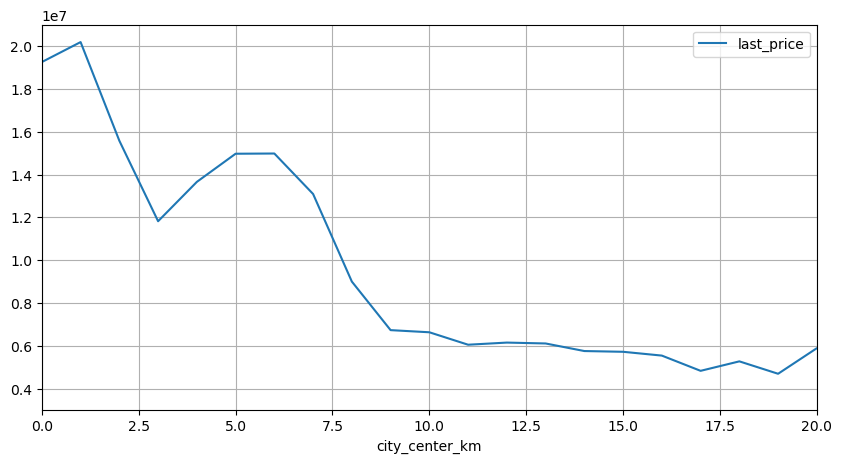

In [432]:
#добавляем столбец со стоимостью одного километра
(
    data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_center_km', values='last_price')
        .plot(grid=True, xlim=(0,20), figsize=(10, 5))
)
plt.show()

По графику мы видим наибольшую среднюю стоимость квартир, расположенных вблизи центра города. С увеличением расстояния, стоиомсть квартир снижается.

Максимальная стомость квартир в диапазоне до 1,0 км. После 8 км падение стоимость замедлилось и практически не происходит.


Таким образом, на расстоянии до 8 км от центра города, на цену значительно влияет удаленность от центра. После 8 км это влияние практически незаметно.


### Общий вывод
#### Полученные данные
Для выполнения задачи были получены данные в формате csv.

Данные содержали в себе информацию по объектам недвижимости в количестве 23699 строк и 21 столбец с параметрами этой недвижимости.

На этапе общего обзора данных были построены гистограммы по каждому столбцу и выявлены аномальные значения (высокие) в столбце `ceiling_height' (высота потолка).
#### Предобработка данных

##### Пропуски

Предобработка данных началась с анализа и  последующего заполнения пропусков. В 13 столбцах были обнаружены пропуски разного количества для каждого столбца.

- В столбце `is_apartment` (апартаменты) пропуски оставлены как есть, так как достоверно неизвестно какое количество пользователей заполняли данный столбец при наличии аппартаментов. Анализ проводился по всей недвижимости, отдельно аппартаменты не учитывались, в целом их всегда намного меньше, на результат исследования это не повлияло.
- В столбце `balcony` (кол-во балконов) пропуски заполнены "0". Так как предполагаем, что те, кто не заполнил пропуски не имеют балконов. С другой стороны непонятно, имеются ли здесь ввиду также и лоджии.
- В столбцах `locality_name` (город объекта) и `floors_total` (кол-во этажей дома) строки с пропусками были удалены. Их было небольшое количество (49 и 86), повлиять на результаты исследования они не могли. Корректное заполнение не представлялось возможнным.
- В столбце `days_exposition` (дней продажи) пропуски были оставлены, так как они означают, что квартира на момент выгрузки данных находилась в продаже.
- В остальных столбцах, где были обнаружены пропуски (`ceiling_height`, `living_area`, `kitchen_area`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`) пропуски были оставлены. Так как корректная замена без искажения не представлялась возможным. Анализ можно провести без учета этих пропущенных строк.

*Причины возникших пропусков:*
- В столбцах, которые заполняют пользователи, причинами пропусков являются неуказание параметра продавцом квартиры либо техническая ошибка.
- В столбцах с автоматическим заполнением, вероятная причина пропусков - неуказание пользователем точного адреса объекта или техническая ошибка.

##### Аномальные значения

Аномально низкие или высокие значения обнаружены в столбцах: `last_price`, `ceiling_height`, `living_area`, `airports_nearest`.

- В столбце `last_price` было удалено одно аномально низкое значение.
- В столбце `ceiling_height` часть аномально высоких значений была скорректирована (поделена на 10), а часть удалена, также удалены все аномально низкие значения.
- В столбце `living_area` было удалено 3 аномально низких значения.
- В столбце `airports_nearest` было удалено одно аномально низкое значение.

*Аномальные значения присутствовали в данных из-за ошибочного заполнения пользователем или технической ошибки.*

##### Дубликаты

В столбце `locality_name` были обнаружены неявные дубликаты (разное написание населенных пунктов). Наиболее часто встречающиеся дубликаты были скорректированы. Обработка единично встреченных деревень или поселков не повлияет на конечный результат, было решено их оставить.

*Такие неявные дубликаты образованы из-за ручного ввода населенного пункта пользователем. Лучше использовать готовый список значений, чтобы избежать таких проблем в будущем.*

##### Тип данных

В столбце `first_day_exposition` был изменен тип данных на **datetime** для корректного подсчета дат.

##### Новые столбцы

В датафрейм были добавлены новые столбцы:
- `price_sq_m` - стоимость квадратного метра.
- `weekday_exp`, `month_exp`, `year_exp` - день, месяц и год публикации объявления.
- `floor_name` - этажность (первый, последний, другой)
- `city_center_km` - расстояние от центра города в километрах

#### Исследовательский анализ

**Основные параметры недвижимости**

##### Общая площадь

Абсолютное большинство площадей недвижимости находится в диапазоне до 100 кв.м. Также в данных есть до 1000 объектов площадью до от 100 до 200 кв.м.
Объекты, площадью более 200 кв.м, представлены в единичных количествах. 

Минимальная площадь недвижимости составляет 12 кв. м .Максимальная площадь квартир доходит до 900 кв.м.

##### Жилая площадь

В данных есть много пропусков, то есть не все продавцы указали эту характеристику. Поэтому полное сравнение с общей площадью будет некорректно.

Абсолютное большинство недвижимости находятся в диапазоне до 50 кв.м. жилой площади. До 2000 - от 50 до 100 кв.м. Также есть небольшое количество объектов с жилой площадью от 100 до 200 кв.м. Есть единичные случаи с площадью более 200 кв.м. 

Минимальная жилая площадь составляет 6,0 кв.м. Максимальная жилая площадь составляет более 400 кв.м.

##### Площадь кухни

В данных есть много пропусков, то есть не все продавцы указали эту характеристику. Поэтому полное сравнение с общей или жилой площадью будет некорректно.

Абсолютное большинство недвижимости находятся в диапазоне до  20 кв.м площади кухни. Часть  имеют площадь кухни от 20 до 40 кв.м (около 500). Кухни, площадью более 40 кв.м являются редкостью в данных.

Минимальная площадь кухни составляет 1,3 кв.м. Максимальная - 112 кв.м.

##### Цена объекта

Стоимость абсолютного большинства недвижимости находится в пределах 10 млн. руб (чаще всего 4-5). Небольшая часть стоит от 10 до 50 млн. руб. Очень редко встречаются объекты стоимостью от 50 до 420 млн руб. 

Минимальная стоимость недвижимости - 490 тыс. руб. Максимальная - 420 млн. руб.

##### Количество комнат

Абсолютное большинство объектов имеют от 1 до 3 комнат. До 1000 имеют 4 комнаты, менее 500 - 5 комнат. 6 комнат и более имеют единичные объекты недвижимости. 

Максимальное количество комнат - 16.

##### Высота потолков

Абсолютное большинство квартир находятся в диапазоне высот потолков от 2,4 до 2,7 м. Большая часть имеет высоту от 2,7 до 3,1 м. Высоты потолков от 3,1 до 4,2 м встречаются намного реже. Выше 4,2 м - единичные случаи.

Минимальная высота потолков в выборке 2,4 м. Максимальная 6,0 м.

##### Этаж квартиры

Абсолютное большинство недвижимости находится на этаже от 1 до 7. Около 3000 квартир в выборке от 7 до 13 этажа. Реже встречаются объекты от 13 до 24 этажей. От 24 до 30 этажей - наиболее редкие случаи.

Самый низкий этаже - 1, высокий 30.

##### Тип этажа квартиры

Абсолютное большинство квартир (около 10 тыс.) расположены не на первом и не на последнем этажах. На последнем этаже больше квартир (около 2 тыс), чем на первом (менее 2 тыс.), но эта разница невелика.

##### Этажность дома

Большая часть домов имеют этажность от 5 до 12. Следующая категория от 12 до 16. Чуть меньше малоэтажных домов - от 1 до 5 этажей. Еще реже встречаются дома от 16 до 28 этажей. Дома выше 28 этажей редки.

Минимальная этажность - 1, максимальная - 60.

##### Расстояние до центра города

Большая часть квартир находится на расстоянии от 7 км до 20 км от центра. Меньше квартир с расстоянием до центра до 7 км.
Реже встречаются квартиры от 20 до 40 км от центра, а также от 46 до 52. Остальные расстояния от центра отмечаются редко.

Минимальное значение от центра 181 м, максимальное 65968 м.

В данных было много пропусков, они не оценивают всю выборку.

##### Расстояние до аэропорта

Большая часть недвижимости находится на расстоянии от 7 до почти 40 км. Меньшая часть расположена на расстоянии от около 38 км до более чем 50. Еще реже встречается недвижимость на расстоянии от около 54 до почти 70 км до аэропорта. Значения более 70 км встречаются редко.

Минимальное значение расстояния - 6914 м, максимальное 84869 м.

В данных было много пропусков, они не оценивают всю выборку.

##### Расстояние до парка

Большая часть квартир расположена на расстоянии от около 400 до 600 м до парка. Меньше до 400 м. Еще реже - от 600 до почти 1000 м. Редко встречаются квартиры с расстоянием  до парка более 1000 м.

Минимальное значение расстояния - 3 м, максимальное 3190 м.

В данных было много пропусков, они не оценивают всю выборку.

##### День публикации объявления
Большинство объявлении было опубликовано в будние дни. Вторник и среда лидируют с приблизительно одинаковым числом публикаций. Самые редки дни - суббота и воскресенье. В воскресенье чуть реже, чем в субботу.

##### Месяц публикации объявления

Большая часть объявлений опубликована в весенние месяцы (февраль, март, апрель). С мая начинается резкое снижение количества публикаций и постепенный рост до максимумов в ноябре и резкая просадка в декабре.

Самые минимальные месяцы с точки зрения публикации объявлений - май, июнь, январь и декабрь.

*Был проведен анализ данных по разным параметрам. Можно сделать вывод что данные достаточно разношерстные, выборка представлена очень широкая.*

**Скорость продаж квартир**

Среднее значение экспозиции объявления - 192 дня.
Медианное  - 106 дней.
Половина объявлений находятся в продаже до 106 дней, вторая половина больше 106 дней.

Быстрыми можно считать продажи в пределах первого квартиля - до 45 дней. 
Долгие продажи в пределах последнего квантиля - от 251 до 1580 дней.

**Факторы влияющие на цену объекта**

Из количественных параметров наиболее сильная зависимость цены квартиры от общей площади (корреляция 0,7), чуть ниже жилая площадь (корреляция 0,6), площадь кухни (корреляция 0,5).

Категориальные параметры также позволяют судить о зависимости средних цен на квартиры:
- Рост средней цены от количества комнат (до 8-комнатных вариантов включительно, после из-за уникальности предложений зависимость сходит на нет.
- На последнем этаже самая высокая средняя цена недвижимости, на первом самая низкая.
- Есть тенденция к снижению средней цены размещения от понедельника к субботе. Рост этого показателя в воскресенье. При этом максимальная средняя цена в среду, чуть ниже в понедельник.
- Между месяцами не наблюдается четкой зависимости, при этом, явно наблюдается наибольшая средняя цена размещения в декабре и минимальные цены в марте и в июне.
- По годам размещения мы видим заметное снижение средних цен с 2014 по 2019 годы. Небольшой рост произошел с 2017 году по сравнению с 2018, потом снова падение в 2018 (минимальная цена) и рост в последний из исследуемых годов - 2019.

*Вывод: все исследованные параметры показали некоторую зависимость цен на недвижимость.*

**Средняя цена квадратного метра**

Самая высокая средняя стоимость недвижимости за квадратный метр в Санкт-Петербурге - более 115 тыс за кв.м. Следом по убыванию распологаются: Пушкин (104 тыс), Кудрово (96 тыс), Парголово (91 тыс), Мурино (88 тыс), Петергоф (85 тыс), Шушары (79 тыс), Колпино (76 тыс), Гатчина (69 тыс), Всеволжск (67 тыс).

**Средняя стоимость каждого километра от центра Санкт-Петербурга**

На расстоянии до 8 км от центра города, на цену значительно влияет удаленность от центра. После 8 км это влияние практически незаметно.

**Заключение:**

В рамках задачи был проведен обширный анализ объектов недвижимости по полученным данным. Выявлены различные зависимости и особенности, расчитаны новые параметры.

Исследование было успешно завершено.